In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [23]:
# Create Sample Data

In [24]:
num_samples = 5000  # Number of samples in the synthetic dataset


In [25]:
np.random.seed(42)  # For reproducibility

data = pd.DataFrame({
    'Molecular Weight': np.random.uniform(300, 500, num_samples),
    '#RO5 Violations': np.random.randint(0, 5, num_samples),
    'AlogP': np.random.uniform(1, 5, num_samples),
    'Smiles': ['C[C@H](N)C(=O)O'] * num_samples,  # Simplified example
    'Assay Description': ['Binding assay'] * num_samples,
    'Assay Type': ['Inhibition'] * num_samples,
    'Assay Organism': ['Homo sapiens'] * num_samples,
    'Assay Tissue Name': ['Liver'] * num_samples,
    'Assay Cell Type': ['Hepatocyte'] * num_samples,
    'Ligand Efficiency BEI': np.random.uniform(10, 20, num_samples),
    'Ligand Efficiency LE': np.random.uniform(0.1, 0.5, num_samples),
    'Ligand Efficiency LLE': np.random.uniform(2, 7, num_samples),
    'Ligand Efficiency SEI': np.random.uniform(5, 15, num_samples),
    'Document Year': np.random.randint(2000, 2023, num_samples)
})


In [26]:
data['Standard Value'] = np.random.uniform(0.01, 10, num_samples)  # IC50 values in µM


In [27]:
#  Build Machine learning Model for predicting IC50 Standard value

In [28]:
# Select feature columns (excluding 'Smiles' for simplicity)
feature_columns = ['Molecular Weight', '#RO5 Violations', 'AlogP', 'Ligand Efficiency BEI',
                   'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Document Year']

X = data[feature_columns]
y = data['Standard Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Initialize and train the model
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfrmodel.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = rfrmodel.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 8.426721893456547


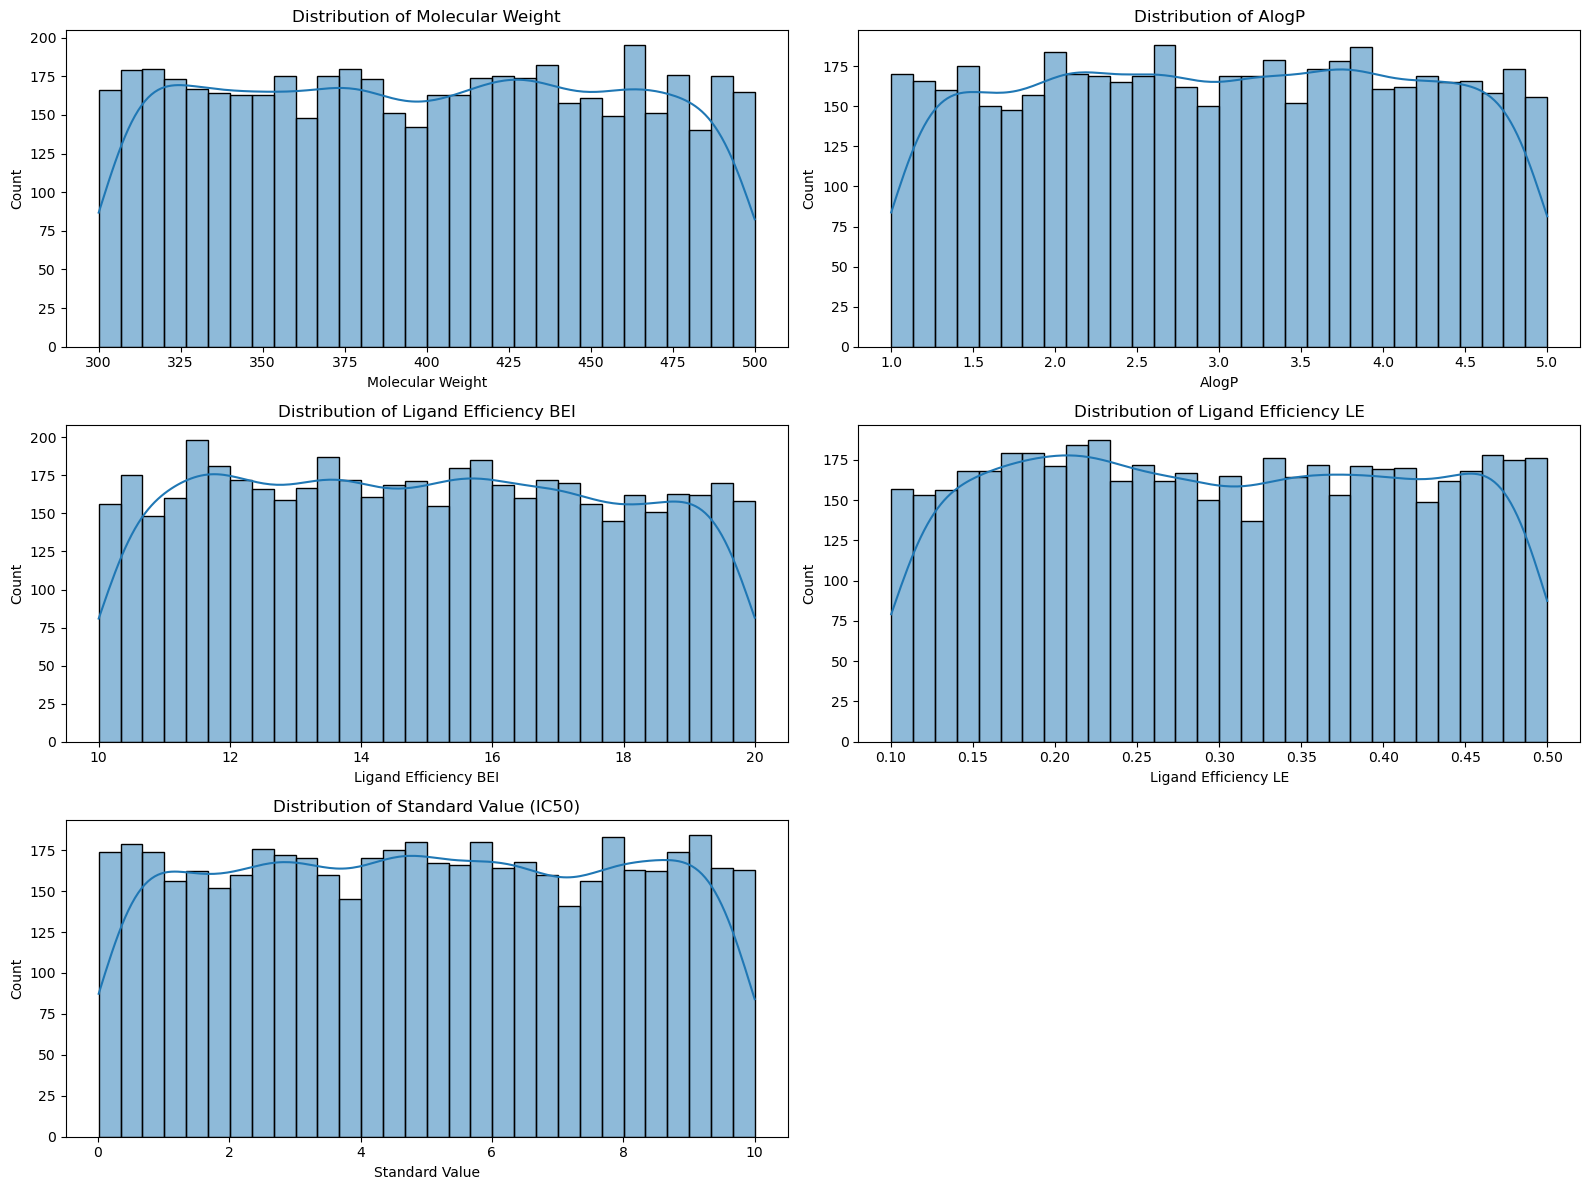

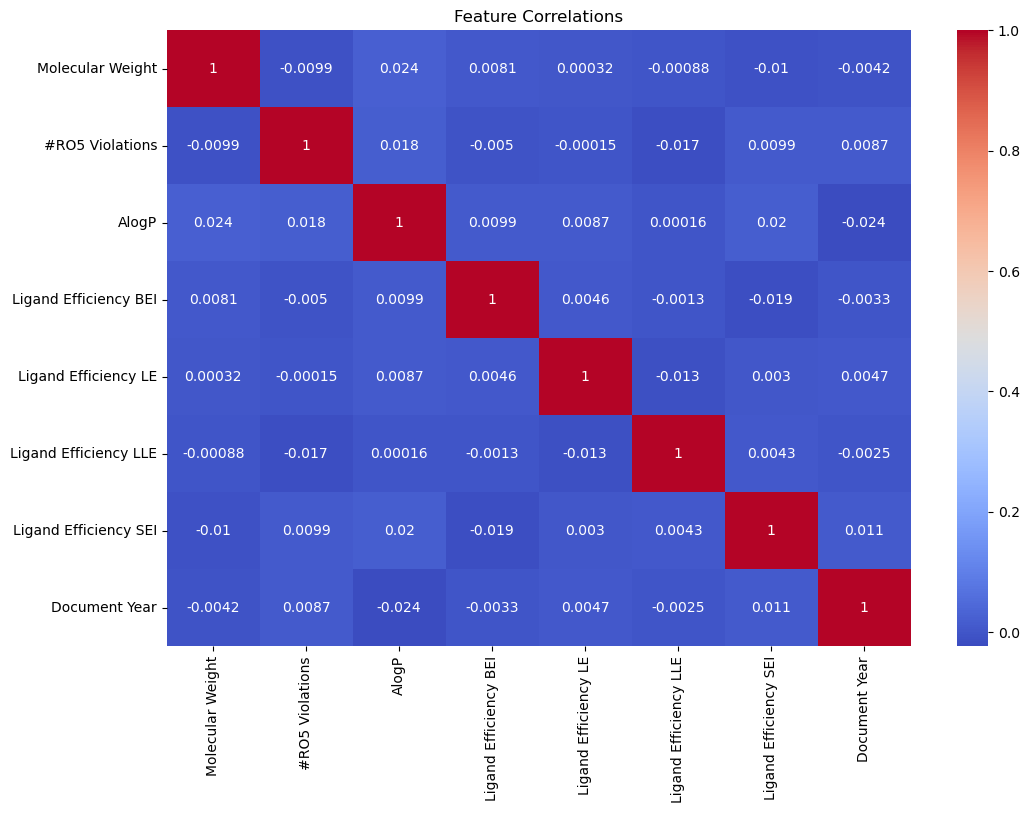

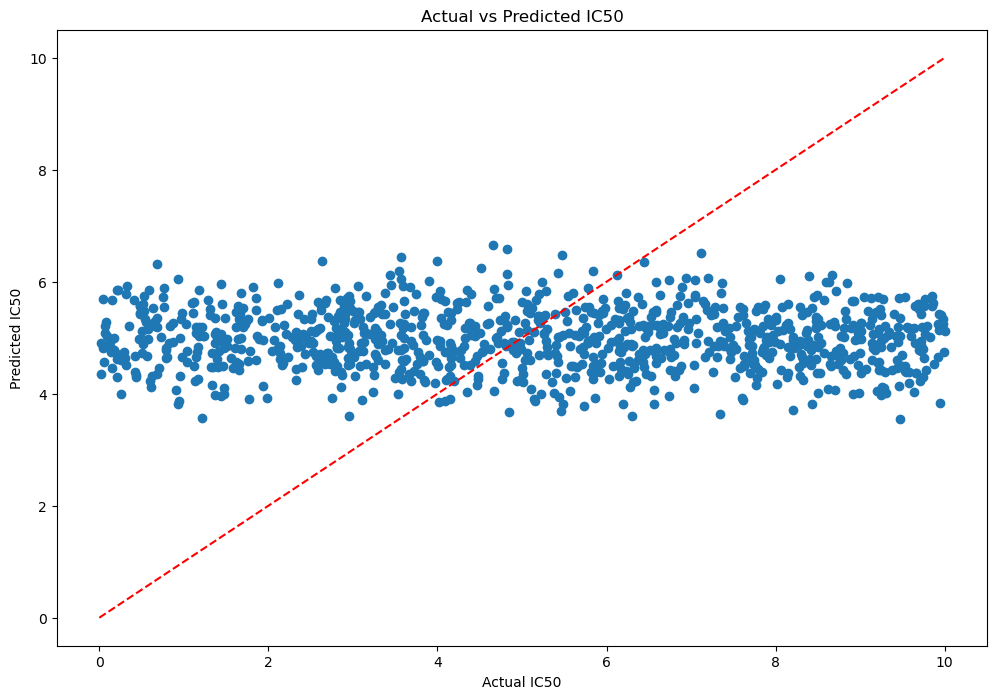

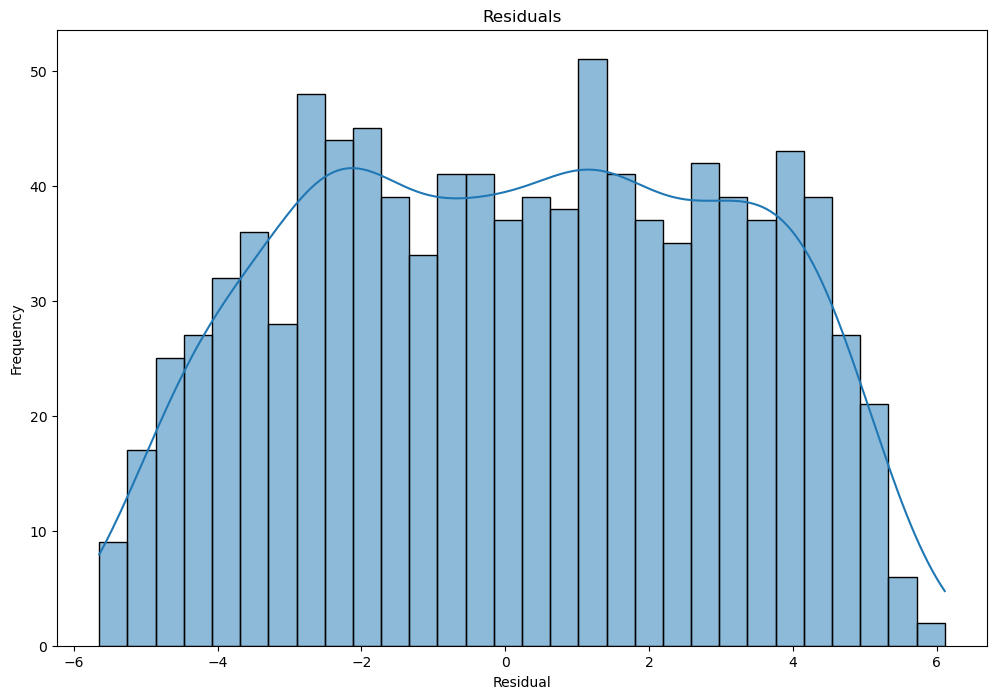

In [32]:
# Plotting
plt.figure(figsize=(16, 12))

# 1. Distribution of features
plt.subplot(3, 2, 1)
sns.histplot(data['Molecular Weight'], bins=30, kde=True)
plt.title('Distribution of Molecular Weight')

plt.subplot(3, 2, 2)
sns.histplot(data['AlogP'], bins=30, kde=True)
plt.title('Distribution of AlogP')

plt.subplot(3, 2, 3)
sns.histplot(data['Ligand Efficiency BEI'], bins=30, kde=True)
plt.title('Distribution of Ligand Efficiency BEI')

plt.subplot(3, 2, 4)
sns.histplot(data['Ligand Efficiency LE'], bins=30, kde=True)
plt.title('Distribution of Ligand Efficiency LE')

plt.subplot(3, 2, 5)
sns.histplot(data['Standard Value'], bins=30, kde=True)
plt.title('Distribution of Standard Value (IC50)')

plt.tight_layout()
plt.show()

# 2. Feature correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

# 3. Actual vs Predicted
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual IC50')
plt.ylabel('Predicted IC50')
plt.title('Actual vs Predicted IC50')
plt.plot([0, 10], [0, 10], 'r--')
plt.show()

# 4. Residuals
plt.figure(figsize=(12, 8))
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()